In [1]:
import numpy as np
import pandas as pd
import os
from itertools import combinations
		
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz # 绘制决策边界的包，对于分类问题
from dtreeviz import decision_boundaries # 与上同

In [2]:
class Data_Read(object):
    def __init__(self, csv_path: str, target_csv: List[str]):
        # 读取csv文件
        assert type(csv_path) == str
        assert type(target_csv) == list or tuple
        self.csv_path = csv_path
        self.target_csv = target_csv

    def __call__(self):
        # 对文件进行筛选，并形成df
        csves = os.listdir(self.csv_path)
        csv_files_list = [os.path.join(self.csv_path, csv) for csv in csves if csv in self.target_csv]
        df_list = [pd.read_csv(csv) for csv in csv_files_list]
        df = pd.concat(df_list, axis=0)
        df_new = df.set_index('png_name', drop=True, verify_integrity=True)
        return df_new, df_list[0], df_list[1]
    
    def hy_tools(self):
        df, r = self(), 2
        features_num = df.columns.__len__() - 1
        fea_list = list(range(features_num))
        combinations_list = list(combinations(fea_list, r))
        return combinations_list
    
    def Fix_col(self):
        df_list = self()
        new_df_list = []
        for df in df_list:
            cols = df.columns
            new_cols = []
            for col in cols:
                if col == 'area':
                    col = 'Area (μm²)'
                elif col == 'circumferfence':
                    col = 'Circumference (μm)'
                elif col == 'short dia':
                    col = 'Short Diameter (μm)'
                elif col == 'long dia':
                    col = 'Long Diameter (μm)'
                elif col == 'Count':
                    col = 'Count'
                elif col == 'aspect':
                    col = 'Aspect Ratio'
                new_cols.append(col)
            df.columns = new_cols
            new_df_list.append(df)
        assert df[df['Aspect Ratio'] < 0].shape[0] == 0
        return new_df_list
    
    def split_dataset(self, test_size=.2, random_state=42):
        X = self()[0].iloc[:,0:-2]
        y = self()[0].iloc[:,-1]
        X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=test_size, random_state=random_state, shuffle=True)
        return X_train, X_test, y_train, y_test        

In [3]:
## 对读取的dfn和df2n的数据进行z-score处理
from sklearn.preprocessing import StandardScaler # 用于数据标准归一化；；
from scipy.stats import norm
n = Data_Read(r'./csv',['df_1_filter.csv','df_2_filter.csv'])
df = n.Fix_col()[0]
df_labes = df.iloc[:,-1].to_frame()
df_Count = df['Count'].to_frame()
df_fit = df.drop(columns=['Count', 'labels'],axis=1)
df_fit['Long+Short'] = (df_fit['Long Diameter (μm)'] + df_fit['Short Diameter (μm)'])/2
#  >>> z-scores
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df_fit), columns=df_fit.columns)
print('df_scaler', df_scaler.columns)
df_scaler.index = df.index
df_scalered = pd.concat([df_scaler, df_Count, df_labes], axis=1)

df_scalered.describe()

df_scaler Index(['Area (μm²)', 'Circumference (μm)', 'Short Diameter (μm)',
       'Long Diameter (μm)', 'Aspect Ratio', 'Long+Short'],
      dtype='object')


,Area (μm²),Circumference (μm),Short Diameter (μm),Long Diameter (μm),Aspect Ratio,Long+Short,Count,labels
count,1.778000e+03,1.778000e+03,1.778000e+03,1.778000e+03,1.778000e+03,1.778000e+03,1778.000000,1778.000000
mean,-9.591128e-17,-1.598521e-16,2.557634e-16,-3.197043e-16,-2.717486e-16,-6.074381e-16,4.943195,1.288526
std,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00,2.469996,0.453205
min,-1.672302e+00,-2.141072e+00,-2.319501e+00,-1.985767e+00,-1.961241e+00,-2.151891e+00,1.000000,1.000000
25%,-6.576792e-01,-6.041521e-01,-5.851128e-01,-6.515847e-01,-7.950729e-01,-6.147560e-01,3.000000,1.000000
50%,-3.322333e-01,-2.383515e-01,-2.350799e-01,-2.290933e-01,-4.609889e-02,-2.408621e-01,4.500000,1.000000
75%,6.824344e-01,6.870369e-01,7.269075e-01,6.813083e-01,6.155301e-01,6.911331e-01,6.000000,2.000000
max,2.605110e+00,2.321842e+00,2.264756e+00,2.562181e+00,2.443462e+00,2.307738e+00,12.000000,2.000000


C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



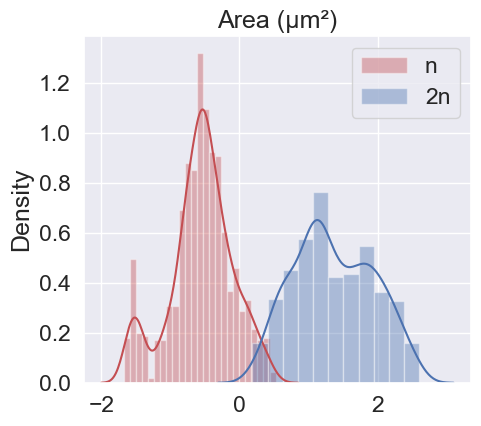

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



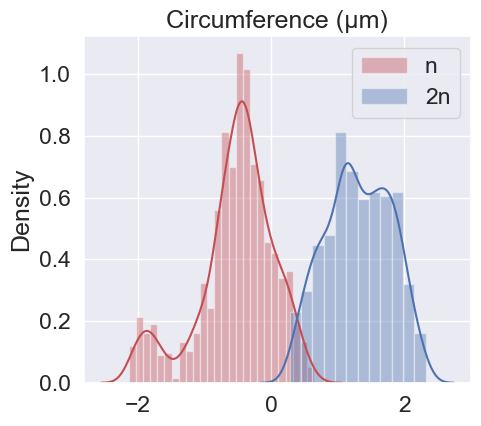

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



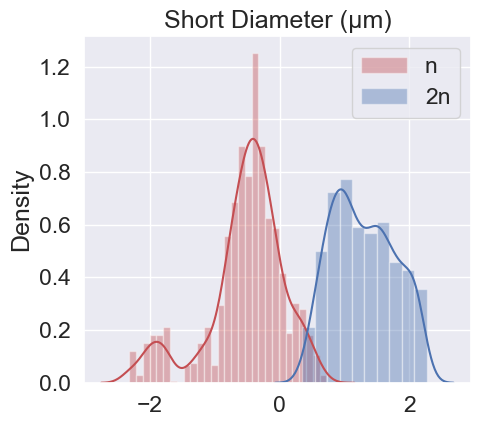

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



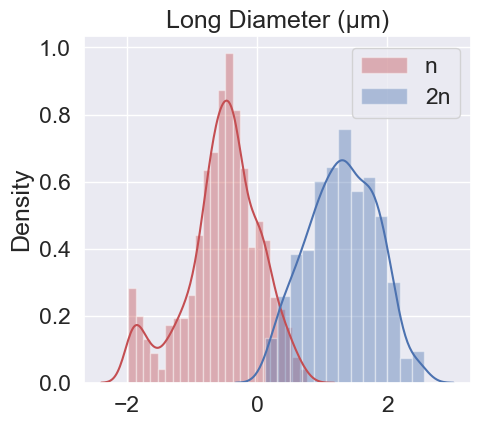

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



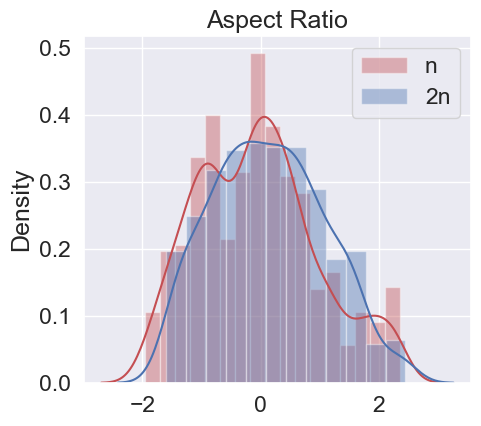

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



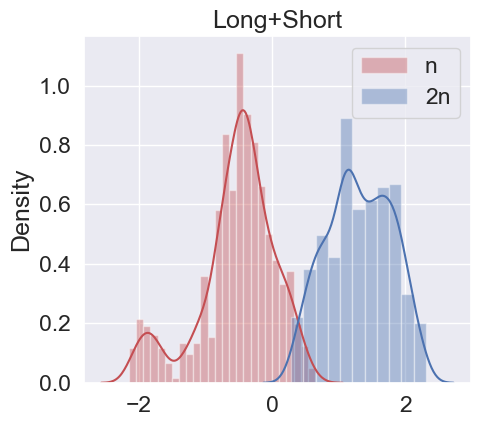

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\16477\AppData\Local\Temp\ipykernel_39996\2904117003.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



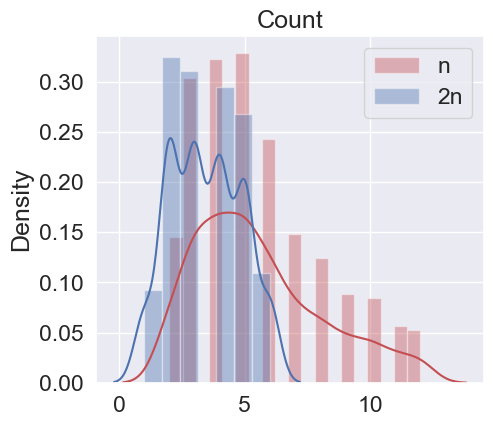

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def group_feat(df):
    X1, X2, cols= [], [], []
    for col in df.columns:
        if col == 'labels':
            continue
        x1 = df_scalered[df_scalered['labels'] == 1][col]
        x2 = df_scalered[df_scalered['labels'] == 2][col]
        X1.append(x1)
        X2.append(x2)
        cols.append(col)
        
    return zip(X1, X2, cols)


group_fea = group_feat(df_scalered)

#def plot_dist_feat(group_fea, output_path):
for x1, x2, col in group_fea:
    sns.set_theme(style='darkgrid', font_scale=1.5)
    plt.figure(figsize=(5, 4.5))
    sns.distplot(x1, label='n',kde=True, color='r')
    sns.distplot(x2, label='2n')
    plt.xlabel('')
    plt.legend()
    plt.title(col)
    plt.show()


Index(['Area (μm²)', 'Circumference (μm)', 'Short Diameter (μm)',
       'Long Diameter (μm)', 'Aspect Ratio', 'Long+Short', 'Count'],
      dtype='object')
随机森林的精度为:0.986


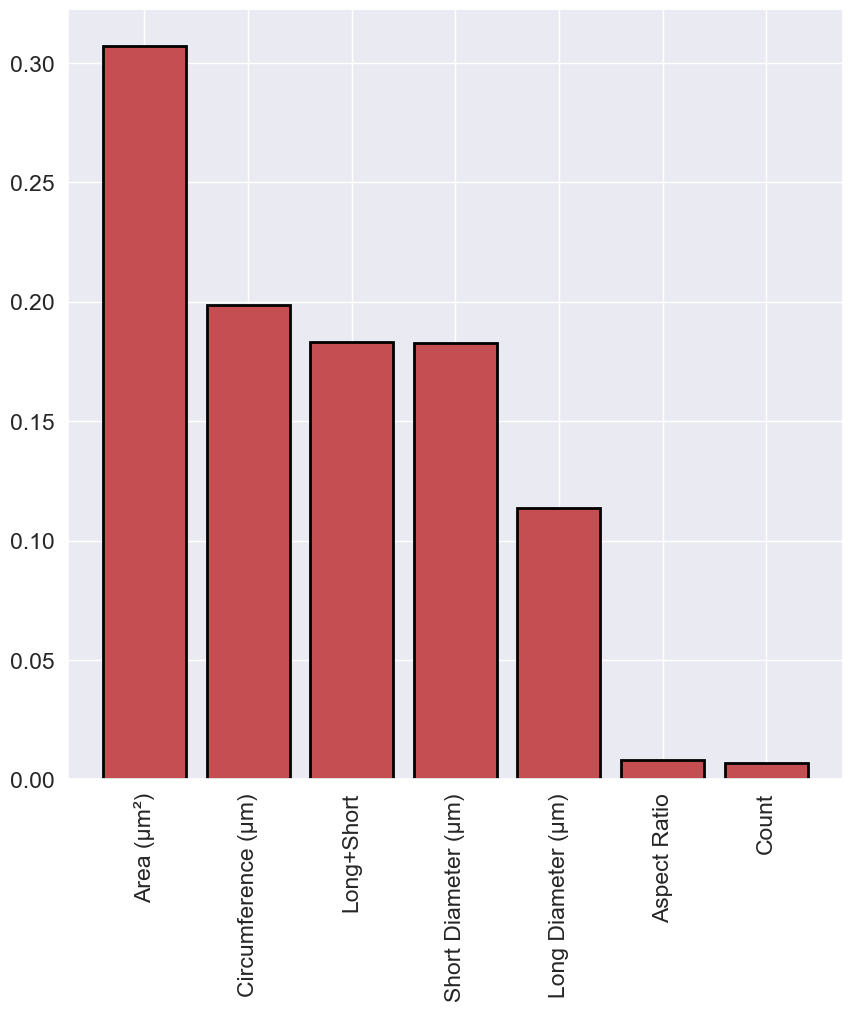

In [25]:
# 不进行任何处理，直接拟合数据建模
# 找出数据中对分类最有用的特征，采用RFE
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, classification_report, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import shap

X = df_scalered.iloc[:, :-1]
print(X.columns)
y  = df_scalered['labels']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)
rfc = RandomForestClassifier(min_samples_split=3, n_estimators=300, random_state=101).fit(x_train, y_train)
print('随机森林的精度为:{0:.3f}'.format(rfc.score(x_test, y_test))) # 与降维相比，显然精度不够
im_frea = rfc.feature_importances_

zip_list = list(zip(im_frea, x_train.columns))
zip_list.sort(reverse=True)

new_fea, col = zip(*zip_list)



plt.figure(figsize=(10, 10))
plt.bar(range(len(im_frea)), new_fea, align='center',color='r',
        edgecolor='black', linewidth=2)
# 图像旋转
plt.xticks(range(len(im_frea)), col, rotation=90)
plt.show()


In [20]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
x_rfe = rfe.fit_transform(X, y)

lda_afterfre = LinearDiscriminantAnalysis(n_components=1)
x_lda_rfe = lda_afterfre.fit_transform(x_rfe, y)
rfe_x_train, rfe_x_test, rfe_y_train, rfe_y_test = train_test_split(x_lda_rfe, y, test_size=.2, shuffle=True, random_state = 101)

rdf_model = RandomForestClassifier(min_samples_split=3, n_estimators=300)
rdf_model.fit(rfe_x_train, rfe_y_train)
rfe_y_pred = rdf_model.predict(rfe_x_test)


print(X.columns[rfe.get_support()])
print('降维后随机森林拟合的精度为:{0:.3f}'.format(rdf_model.score(rfe_x_test, rfe_y_test)))
print(classification_report(rfe_y_pred, rfe_y_test))
print("Support is %s" % rfe.support_) # 是否促留.f1_score(rfe_y_test, rfe_y_pred, average='weighted')))
print("Support is %s" % rfe.support_) # 是否保留
print("Ranking %s" % rfe.ranking_) # 重要程度排名

Index(['Area (μm²)', 'Circumference (μm)', 'Short Diameter (μm)',
       'Long Diameter (μm)', 'Long+Short'],
      dtype='object')
降维后随机森林拟合的精度为:0.992
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       261
           2       0.98      0.99      0.98        95

    accuracy                           0.99       356
   macro avg       0.99      0.99      0.99       356
weighted avg       0.99      0.99      0.99       356

Support is [ True  True  True  True False  True False]
Support is [ True  True  True  True False  True False]
Ranking [1 1 1 1 3 1 2]


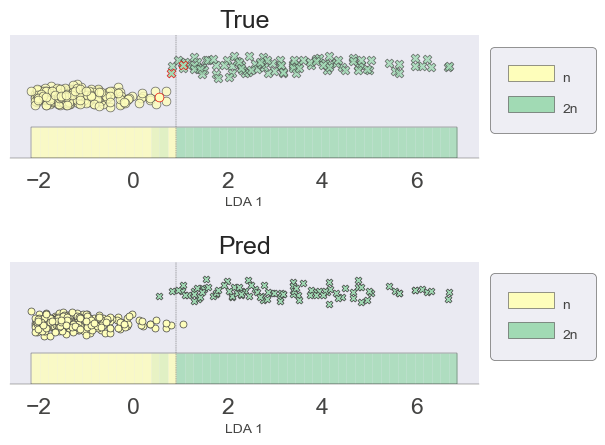

In [21]:
# 绘制决策边界
fig, axes = plt.subplots(nrows=2, ncols=1)
decision_boundaries(rdf_model, rfe_x_test, rfe_y_test - 1, ax=axes[0], markers=['o', 'X'],
                    feature_names=['LDA 1'], class_names=['n','2n'], figsize=(10, 1.5),
                    boundary_markersize= 5, fontsize=10, boundary_marker= '^', dot_w=40,
                    colors={'scatter_marker_alpha':.8,'scatter_marker_color':'black',
                            'scatter_marker_edge_alpha':1,'scatter_marker_edge_color':'black',
                            'class_boundary': 'red'})
decision_boundaries(rdf_model, rfe_x_test, rfe_y_pred-1, ax=axes[1], feature_names=['LDA 1'],  markers=['o','X'], class_names=['n','2n'],
                    boundary_marker='^', fontsize=10,
                                    colors={'scatter_marker_alpha':1,'scatter_marker_color':'black',
                            'scatter_marker_edge_alpha':1,'scatter_marker_edge_color':'black'})
axes[0].set_title('True')
axes[1].set_title('Pred')
plt.tight_layout()
plt.show(fig)

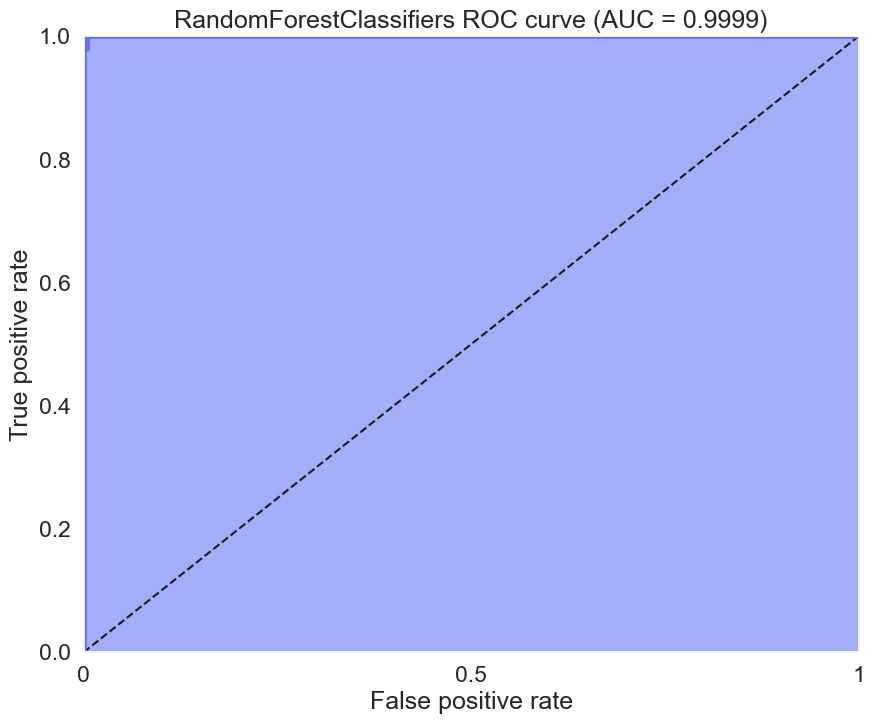

In [23]:
# 绘制ROC曲线等;
import seaborn as sns
y_score = rdf_model.predict_proba(rfe_x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(rfe_y_test-1, y_score)

aucval = auc(fpr, tpr)    # 计算auc的取值

plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,"#636efa",linewidth = 4)
plt.grid()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.fill_between(fpr, tpr,color ='#a4adf7')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(ticks=[0,.5,1],labels=[0,0.5,1])
plt.title("RandomForestClassifiers ROC curve (AUC = {0})".format(str(round(aucval,4))))
plt.show()
